In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

In [3]:
data=pd.read_csv('mushrooms.csv')

In [4]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [13]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data_l = data
for i in data_l:
  data_l[i]=le.fit_transform(np.array(data_l[i]))
X=data_l.drop(["class"], axis=1)
y=data_l["class"]
sc = StandardScaler()
X_s=sc.fit_transform(X)

In [41]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_s)

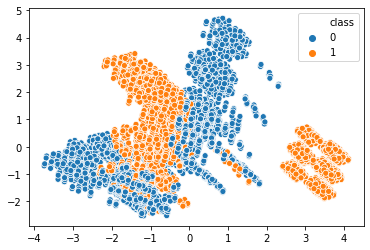

In [42]:
sns.scatterplot(X_pca[:,0],X_pca[:,1],hue=y)

In [43]:
pca.explained_variance_

array([3.87410924, 2.60339434])

In [50]:
pca.explained_variance_ratio_

array([0.18445868, 0.1239559 ])

In [51]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

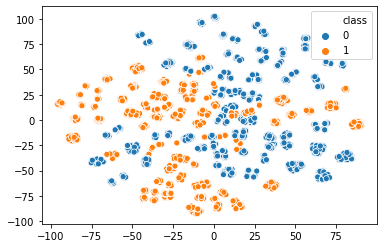

In [52]:
sns.scatterplot(X_tsne[:,0],X_tsne[:,1],hue=y)

In [53]:
from sklearn.cluster import KMeans

In [137]:
n_colors = 2

In [58]:
from skimage import io
img = io.imread("shr.png")
print(img.shape)

(540, 960, 3)


In [64]:
w, h, d = original_shape = img.shape

In [67]:
original_shape

(540, 960, 3)

In [72]:
assert d == 3
img2 = np.reshape(img, (w * h, d))

In [95]:
img2.shape

(518400, 3)

In [92]:
def recreate_image(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -1)

In [141]:
from sklearn.utils import shuffle
image_array_sample = shuffle(img2, random_state=999, n_samples=518400)

In [142]:
kmeans = KMeans(n_clusters=n_colors, random_state=999).fit(image_array_sample)

In [143]:
labels = kmeans.predict(img2)

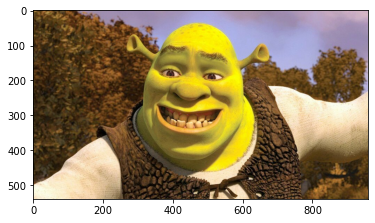

In [94]:
plt.imshow(img)

# 64

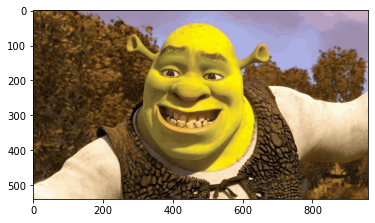

In [112]:
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h).astype(int))

# 32

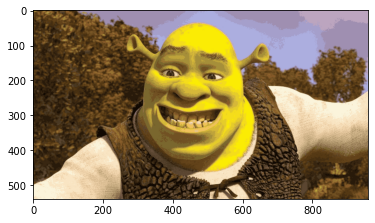

In [117]:
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h).astype(int))

# 16

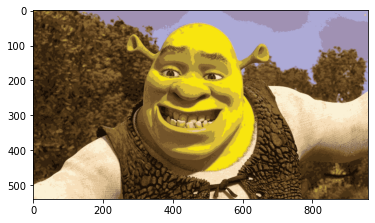

In [127]:
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h).astype(int))

# 8

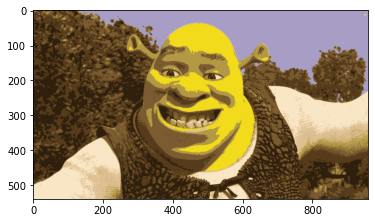

In [122]:
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h).astype(int))

# 4

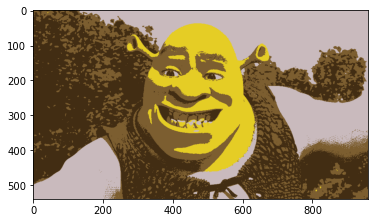

In [136]:
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h).astype(int))

# 2

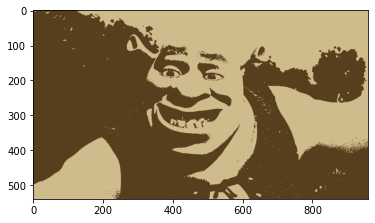

In [145]:
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h).astype(int))

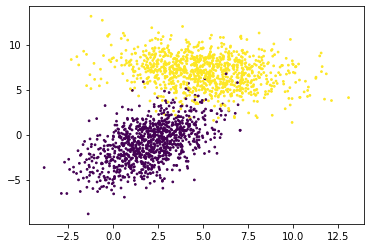

In [164]:
mean_1 = [2, -1]
cov_1 = [[3, 2], [2, 5]]
x_1 = np.random.multivariate_normal(mean_1, cov_1, 1000)
mean_2 = [2, -1]
cov_2 = [[6, -1], [-1, 3]]
x_2 = np.random.multivariate_normal(mean_2, cov_2, 1000)
X = np.concatenate([x_1, x_2])
y = np.array([0] * 1000 + [1] * 1000)
X, y = shuffle(X, y, random_state=999)
plt.scatter(X[:, 0], X[:, 1], s = 3, c = y)

In [208]:
from sklearn.mixture import GaussianMixture
GMM = GaussianMixture(n_components=2, covariance_type='full')
GMM.fit(X)

GaussianMixture(n_components=2)

In [209]:
labels=GMM.predict(X)

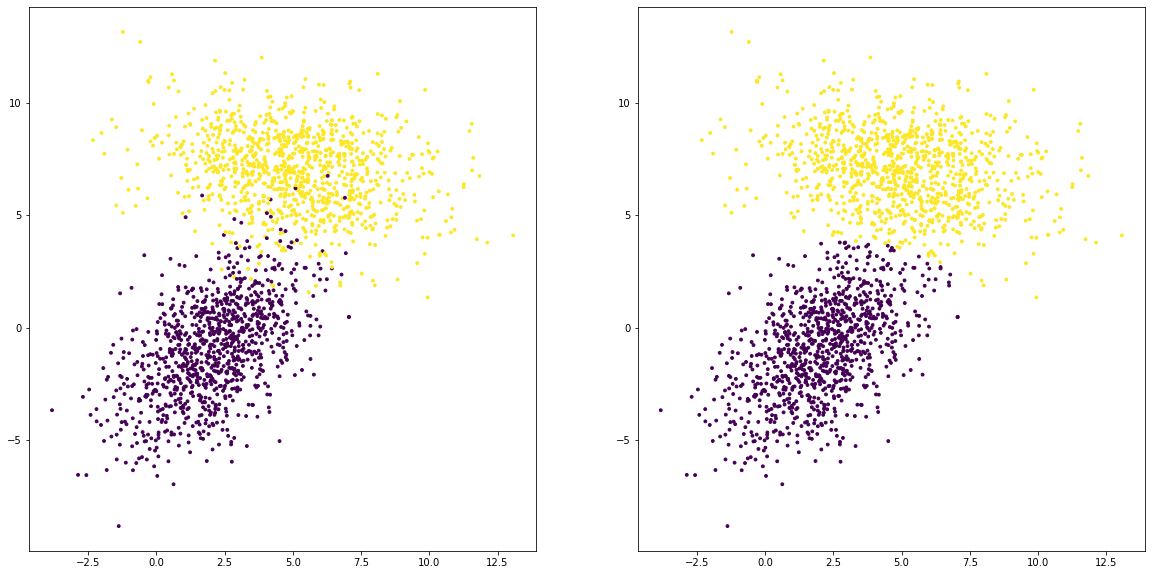

In [210]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], s = 8, c = y)
plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], s = 8, c = labels)

In [211]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y, labels))

0.977


In [217]:
GMM.means_

array([ 2.06665332, -0.96727374])

In [220]:
GMM.covariances_

array([[[ 3.04035163,  2.05729819],
        [ 2.05729819,  4.93314778]],

       [[ 6.08220136, -1.02131223],
        [-1.02131223,  3.13753296]]])

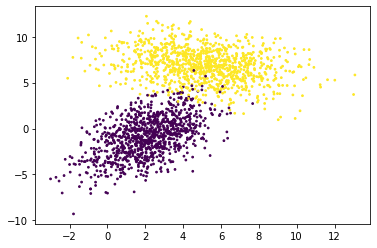

In [223]:
mean_11 = GMM.means_[0]
cov_11 = GMM.covariances_[0]
x_11 = np.random.multivariate_normal(mean_11, cov_11, 1000)
mean_21 = GMM.means_[1]
cov_21 = GMM.covariances_[1]
x_21 = np.random.multivariate_normal(mean_21, cov_21, 1000)
X1 = np.concatenate([x_11, x_21])
y1 = np.array([0] * 1000 + [1] * 1000)
X1, y1 = shuffle(X1, y1, random_state=999)
plt.scatter(X1[:, 0], X1[:, 1], s = 3, c = y1)

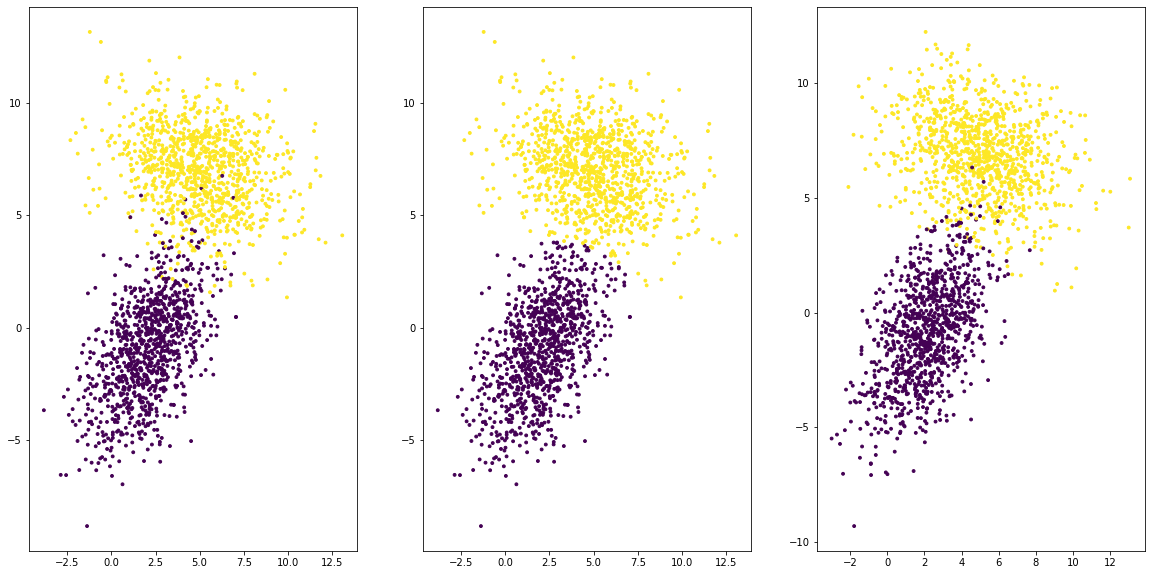

In [224]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.scatter(X[:, 0], X[:, 1], s = 8, c = y)
plt.subplot(1,3,2)
plt.scatter(X[:, 0], X[:, 1], s = 8, c = labels)
plt.subplot(1,3,3)
plt.scatter(X1[:, 0], X1[:, 1], s = 8, c = y1)

In [226]:
from sklearn.datasets import fetch_20newsgroups
all_train = fetch_20newsgroups(subset='train')

In [228]:
all_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [231]:
 print("\n".join(all_train.data[0].split("\n")[:10]))

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 


In [242]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [529]:
ll = fetch_20newsgroups()

In [237]:
categories = ['rec.autos', 'rec.sport.baseball', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'), categories=categories)

In [444]:
tfidf_vectorizer = TfidfVectorizer(max_df=500, min_df=10)
tfidf_train = tfidf_vectorizer.fit_transform(newsgroups_train.data)
tfidf_test =  tfidf_vectorizer.transform(newsgroups_test.data)

In [445]:
tfidf_vectorizer.get_feature_names()

['00',
 '000',
 '01',
 '02',
 '04',
 '05',
 '06',
 '08',
 '10',
 '100',
 '1000',
 '11',
 '110',
 '12',
 '125',
 '128',
 '13',
 '130',
 '14',
 '15',
 '150',
 '1500',
 '16',
 '17',
 '18',
 '19',
 '1968',
 '1970',
 '1980',
 '1983',
 '1984',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1b',
 '1st',
 '20',
 '200',
 '2000',
 '202',
 '21',
 '22',
 '222',
 '225',
 '23',
 '24',
 '25',
 '250',
 '26',
 '27',
 '28',
 '286',
 '29',
 '2b',
 '2nd',
 '30',
 '300',
 '3000',
 '301',
 '31',
 '32',
 '33',
 '336',
 '34',
 '35',
 '350',
 '354',
 '355',
 '36',
 '37',
 '38',
 '39',
 '3b',
 '3rd',
 '40',
 '400',
 '4000',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '483',
 '4th',
 '50',
 '500',
 '51',
 '517',
 '52',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '600',
 '61',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '6th',
 '70',
 '71',
 '713',
 '72',
 '73',
 '75',
 '750',
 '76',
 '78',
 '79',
 '7th',
 '80',
 '800',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',


In [257]:
corpus = [
...     'This is the first document.',
...     'This document is the second document.',
...     'And this is the third one.',
...     'Is this the first document?',
... ]
>>> vectorizer = TfidfVectorizer()
>>> X = vectorizer.fit_transform(corpus)
>>> vectorizer.get_feature_names()

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']

In [297]:
X.toarray()

array([[0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
        0.        , 0.38408524, 0.        , 0.38408524],
       [0.        , 0.6876236 , 0.        , 0.28108867, 0.        ,
        0.53864762, 0.28108867, 0.        , 0.28108867],
       [0.51184851, 0.        , 0.        , 0.26710379, 0.51184851,
        0.        , 0.26710379, 0.51184851, 0.26710379],
       [0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
        0.        , 0.38408524, 0.        , 0.38408524]])

In [298]:
X.shape

(4, 9)

In [299]:
from sklearn.decomposition import LatentDirichletAllocation

In [323]:
lda = LatentDirichletAllocation(n_components=5,random_state=999)

In [324]:
lda.fit(X)

LatentDirichletAllocation(n_components=5, random_state=999)

In [325]:
lda.transform(X)

array([[0.06251691, 0.06333923, 0.06251691, 0.74882989, 0.06279706],
       [0.06527331, 0.73506587, 0.06527331, 0.06851627, 0.06587123],
       [0.06005899, 0.06068567, 0.06005899, 0.06209042, 0.75710593],
       [0.06251691, 0.06333923, 0.06251691, 0.74882989, 0.06279706]])

In [326]:
lda.get_params(deep=True)

{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'batch',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 5,
 'n_jobs': None,
 'perp_tol': 0.1,
 'random_state': 999,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}

In [327]:
lda.components_

array([[0.20005784, 0.20013286, 0.20007388, 0.20024194, 0.20005784,
        0.20006033, 0.20024194, 0.20005784, 0.20024194],
       [0.20002404, 0.88826679, 0.20003119, 0.47935773, 0.20002404,
        0.73848602, 0.47935773, 0.20002404, 0.47935773],
       [0.20005784, 0.20013286, 0.20007388, 0.20024194, 0.20005784,
        0.20006033, 0.20024194, 0.20005784, 0.20024194],
       [0.20001597, 1.13862377, 1.36036509, 0.97122887, 0.20001597,
        0.20001784, 0.97122887, 0.20001597, 0.97122887],
       [0.71169281, 0.20005009, 0.2000276 , 0.46529247, 0.71169281,
        0.2000231 , 0.46529247, 0.71169281, 0.46529247]])

In [332]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [341]:
text = 'This is the first document. This document is the second document. And this is the third one. Is this the first document?'

In [349]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

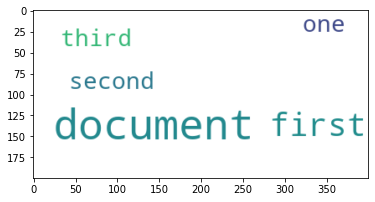

In [350]:
plt.imshow(wordcloud, interpolation='bilinear')

In [352]:
print(wordcloud)

In [436]:
stopwords = set(STOPWORDS)
stopwords.update(["first", "now", "wine", "flavor", "flavors"])

In [356]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white",stopwords=stopwords).generate(text)

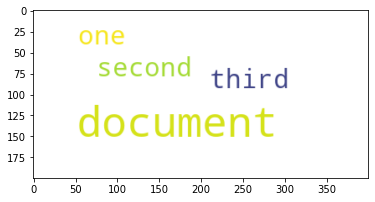

In [357]:
plt.imshow(wordcloud, interpolation='bilinear')

In [ ]:
C:\Users\Матвей\Desktop\20_newsgroups\talk.religion.misc\84360

In [399]:
f = open('Desktop\\newsgroups\\atheism\\49960', 'r')

In [402]:
import os

In [412]:
type(os.listdir(path="Desktop\\newsgroups"))

list

In [414]:
for i in (os.listdir(path="Desktop\\newsgroups")):
    print(os.listdir(path="Desktop\\newsgroups").index(i))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [430]:
df = [0]*20

In [431]:
ind1 = 0
ind2 = 0
for i in (os.listdir(path="Desktop\\newsgroups")):
    df[ind1]=[0]*1000
    ind2 = 0
    for j in (os.listdir(path="Desktop\\newsgroups\\"+i)):
        f = open('Desktop\\newsgroups\\'+i+'\\'+j, 'r')
        df[ind1][ind2]=f.read()
        ind2+=1
    ind1+=1

In [476]:
text = ""
for i in range(5):
    for j in range(1000):
        text+=str(df[i][j])
    print(i)

0
1
2
3
4


In [477]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white",stopwords=stopwords).generate(text)

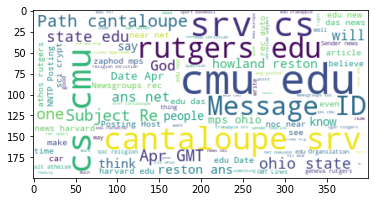

In [478]:
plt.imshow(wordcloud, interpolation='bilinear')

In [479]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

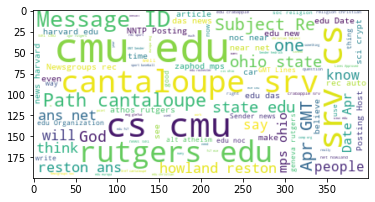

In [480]:
plt.imshow(wordcloud, interpolation='bilinear')

In [452]:
yy = np.array([[i]*1000 for i in range(5)])

In [475]:
yy = []
for i in range(5):
    yy+=[i]*1000

In [473]:
m = []
for i in range(5):
    for j in range(1000):
        m.append(str(df[i][j]))
    print(i)

0
1
2
3
4


In [474]:
np.array(m).shape

(5000,)

In [482]:
x1,y1= shuffle(m, yy, random_state=999)

In [514]:
for i in range(len(x1)):
    x1[i] = x1[i].replace('_', '')

In [545]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=999)

In [588]:
vectorizer = TfidfVectorizer(max_df=500, min_df=10)
X_train_v = vectorizer.fit_transform(X_train)
X_test_v = vectorizer.transform(X_test)
vectorizer.get_feature_names()

['aa',
 'aaa',
 'aardvark',
 'aaron',
 'aas',
 'ab',
 'abandoned',
 'abilities',
 'ability',
 'able',
 'abo',
 'abortion',
 'above',
 'abraham',
 'abs',
 'absence',
 'absent',
 'absolute',
 'absolutely',
 'absolutes',
 'abstract',
 'absurd',
 'absurdities',
 'absurdity',
 'abuse',
 'abuses',
 'ac',
 'acad',
 'academic',
 'acc',
 'accelerate',
 'acceleration',
 'accept',
 'acceptable',
 'acceptance',
 'accepted',
 'accepting',
 'accepts',
 'access',
 'accident',
 'accidents',
 'accommodate',
 'accomplished',
 'accord',
 'accordance',
 'according',
 'account',
 'accountable',
 'accounts',
 'accuracy',
 'accurate',
 'accurately',
 'accuse',
 'accused',
 'achieve',
 'achieved',
 'acker',
 'acknowledge',
 'acknowledged',
 'aclu',
 'acm',
 'acns',
 'acooper',
 'acquire',
 'across',
 'acs',
 'acsu',
 'act',
 'acted',
 'acting',
 'action',
 'actions',
 'active',
 'actively',
 'activities',
 'activity',
 'acts',
 'actual',
 'actually',
 'ad',
 'adagio',
 'adam',
 'add',
 'adda',
 'added',
 'add

In [589]:
X_train_v.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [590]:
X_train_v.shape

(4000, 7225)

In [591]:
lda = LatentDirichletAllocation(n_components=5,random_state=999)

In [592]:
lda.fit(X_train_v)

LatentDirichletAllocation(n_components=5, random_state=999)

In [593]:
X_tr=lda.transform(X_train_v)
X_tr_test=lda.transform(X_test_v)
print(X_tr)

[[0.55945404 0.0240701  0.02262006 0.02245226 0.37140355]
 [0.16765559 0.01522129 0.78599856 0.01534236 0.01578219]
 [0.0241542  0.09118608 0.0236306  0.02371419 0.83731494]
 ...
 [0.03935414 0.56330124 0.03887197 0.03815305 0.32031959]
 [0.03793094 0.38747155 0.03954945 0.03757423 0.49747383]
 [0.07125923 0.02134663 0.0229628  0.08088254 0.80354881]]


In [594]:
from sklearn.linear_model import LogisticRegression

In [595]:
clf = LogisticRegression(random_state=999,multi_class='multinomial')

In [596]:
clf.fit(X_tr,y_train)

LogisticRegression(multi_class='multinomial', random_state=999)

In [597]:
accuracy_score(y_train, clf.predict(X_tr))

0.75625

In [598]:
accuracy_score(y_test, clf.predict(X_tr_test))

0.757